## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [175]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
display(taxi_data.head())

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [176]:
# Переводим признак pickup_datetime в тип данных datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
print(taxi_data.pickup_datetime.dtypes)
print()

# Узнаём временные рамки, за которые представлены данные:
print(min(taxi_data.pickup_datetime))
print(max(taxi_data.pickup_datetime))

datetime64[ns]

2016-01-01 00:00:17
2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [177]:
print("Общее число пропущенных значений равно: ", taxi_data.isnull().sum().sum())
taxi_data.isnull().sum()

Общее число пропущенных значений равно:  0


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [178]:
# а)
print(f"а) В данных присутствует {len(taxi_data.vendor_id.unique())} уникальных таксопарка")
print()

# б)
print(f"б) Максимально во время одной поездки зафиксировано {taxi_data.passenger_count.max()} пассажиров")
print()

# в.1)
print(f"в.1) Cредняя длительность поездки составляет {round(taxi_data.trip_duration.mean())} секунд")
print()

# в.2)
print(f"в.2) Медианная длительность поездки составляет {round(taxi_data.trip_duration.median())} секунды")
print()

# г.1)
print(f"г.1) Минимальное время поездки составляет {taxi_data.trip_duration.min()} секунду")
print()

# г.2)
print(f"г.2) Максимальное время поездки составляет {taxi_data.trip_duration.max()} секунды")
print()

а) В данных присутствует 2 уникальных таксопарка

б) Максимально во время одной поездки зафиксировано 9 пассажиров

в.1) Cредняя длительность поездки составляет 959 секунд

в.2) Медианная длительность поездки составляет 662 секунды

г.1) Минимальное время поездки составляет 1 секунду

г.2) Максимальное время поездки составляет 3526282 секунды



Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [179]:
# Реализуем функцию add_datetime_features():
def add_datetime_features(df):     
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
    return df
 
add_datetime_features(taxi_data)    
display(taxi_data.head())

# Подсчет количества поездок в субботу:
saturday_trips = (taxi_data['pickup_day_of_week'] == 'Saturday').sum()
print(f"В субботу было совершено {saturday_trips} поездок")
print()

# Подсчет среднего количества поездок в день:
day_mean_trips = round(len(taxi_data) / len(taxi_data['pickup_date'].unique()))
print(f"В среднем в день совершается {day_mean_trips} поездок")
print()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday


В субботу было совершено 220868 поездок

В среднем в день совершается 8015 поездок



### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [180]:
holiday_data = pd.read_csv("data/holiday_data.csv", sep=';')
display(holiday_data)

# Переводим признак 'date' в тип данных datetime с форматом год-месяц-день: 
holiday_data['date'] = pd.to_datetime(holiday_data['date'], format='%Y-%m-%d')

# Создаём список с праздничными датами:
holiday_list = list(holiday_data['date'])

# Реализуем функцию add_holiday_features():
def add_holiday_features(taxi_data, holiday_data):
    taxi_data['pickup_holiday'] = taxi_data['pickup_date'].apply(lambda x: pd.Timestamp(x) in holiday_list).astype(int)
    return taxi_data

add_holiday_features(taxi_data, holiday_data)
display(taxi_data.head())

# Вычисляем медианную длительность поездки на такси в праздничные дни:      
holiday_trip_duration = round(taxi_data.loc[taxi_data['pickup_holiday'] == 1, 'trip_duration'].median())

print(f"Медианная длительность поездки в праздничные дни составляет {holiday_trip_duration} секунд")

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,0


Медианная длительность поездки в праздничные дни составляет 585 секунд


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [181]:
osrm_data = pd.read_csv("data/osrm_data_train.csv")

# Реализуем функцию add_osrm_features():
def add_osrm_features(taxi_data, osrm_data):
    # Выделение необходимых столбцов из таблицы osrm_data:
    osrm_subset = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]

    # Объединение таблиц по столбцу id с типом объединения left:
    merged_data = taxi_data.merge(osrm_subset, on='id', how='left')

    return merged_data

# Применяем полученную функцию к таблице:
taxi_data = add_osrm_features(taxi_data, osrm_data)

# Вычисляем разницу между имеющимися двумя вариантами медианной длительности поездки:
print(f"Разница между обоими вариантами медианной длительности поездки составляет {round(taxi_data.trip_duration.median())-round(taxi_data.total_travel_time.median())} секунды")

# Вычисляем количество строк, содержащих пропуски после объединения таблиц:
missing_rows = taxi_data.isnull().any(axis=1).sum()
print(f"Количество строк с пропусками после объединения: {missing_rows}")


Разница между обоими вариантами медианной длительности поездки составляет 372 секунды
Количество строк с пропусками после объединения: 1


In [182]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [183]:
# Реализуем функцию add_geographical_features():
def add_geographical_features(df):
    df['haversine_distance'] = get_haversine_distance(df['pickup_latitude'], df['pickup_longitude'],
                                                      df['dropoff_latitude'], df['dropoff_longitude'])
    df['direction'] = get_angle_direction(df['pickup_latitude'], df['pickup_longitude'],
                                          df['dropoff_latitude'], df['dropoff_longitude'])
    return df

# Применяем полученную функцию к таблице:
taxi_data = add_geographical_features(taxi_data)

# Рассчитываем медианное расстояние Хаверсина поездок:
median_distance = round(taxi_data['haversine_distance'].median(), 2)
print(f"Медианное расстояние Хаверсина поездок равно {median_distance} км")

Медианное расстояние Хаверсина поездок равно 2.09 км


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [184]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, n_init=10, random_state=42) # здесь добавляем "n_init=10", чтобы убрать предупреждение
kmeans.fit(coords)

# Реализуем функцию add_cluster_features():
def add_cluster_features(df, kmeans):
    coords = np.hstack((df[['pickup_latitude', 'pickup_longitude']],
                        df[['dropoff_latitude', 'dropoff_longitude']]))
    cluster_labels = kmeans.predict(coords)
    df['geo_cluster'] = cluster_labels
    return df

# Применяем полученную функцию к таблице:
taxi_data = add_cluster_features(taxi_data, kmeans)

# Вычисляем количество поездок, содержащееся в наименьшем по размеру географическом кластере:
cluster_counts = taxi_data['geo_cluster'].value_counts()
min_cluster_size = cluster_counts.min()
print(f"Количество поездок в наименьшем по размеру географическом кластере равно {min_cluster_size}")

Количество поездок в наименьшем по размеру географическом кластере равно 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [185]:
weather_data = pd.read_csv("data/weather_data.csv")

# Реализуем функцию add_weather_features():
def add_weather_features(df_1, df_2):
    weather_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
    if set(weather_columns).issubset(taxi_data.columns):
        return taxi_data  # Если таблицы уже объединены, возвращаем исходную таблицу
    
    # Преобразуем столбец time в тип datetime и извлекаем даты и часы:
    df_2['time'] = pd.to_datetime(df_2['time'])
    df_2['date'] = df_2['time'].dt.date
    df_2['hour'] = df_2['time'].dt.hour
    
    # Удаляем не интересующие нас столбцы путём сохранения только интересующих:
    df_2 = df_2[['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']]
    #df_2.drop(['time', 'windchill', 'heat index', 'humidity', 'pressure', 'dew Point', 'wind dir', 'conditions', 'gust speed'], axis=1, inplace=True)
    
    # Объединяем таблицу с данными о поездках с таблицей с данными о погодных условиях:
    merged_data = pd.merge(df_1, df_2, left_on=['pickup_date', 'pickup_hour'],
                           right_on=['date', 'hour'], how='left')

    # Удаляем столбцы date и hour:
    merged_data.drop(['date', 'hour'], axis=1, inplace=True)

    return merged_data

# Применяем полученную функцию к таблице:
taxi_data = add_weather_features(taxi_data, weather_data)

# Вычисляем количество поездок, совершенных в снежную погоду:
snow_trips = taxi_data[taxi_data['events'] == 'Snow']
num_snow_trips = len(snow_trips)

print(f"Количество поездок в снежную погоду: {num_snow_trips}")


# Вычисляем процентную долю пропусков:
# Общее количество наблюдений
total_observations = len(taxi_data)

# Количество пропусков в каждом столбце с погодными условиями
missing_values = taxi_data[['temperature', 'visibility', 'wind speed', 'precip', 'events']].isnull().any(axis=1).sum()

# Вычисление суммарного количества пропусков
total_missing_values = missing_values.sum()

# Вычисление доли пропусков в процентах
missing_values_percentage = (total_missing_values / total_observations ) * 100

print(f"Доля пропусков в столбцах с погодными условиями: {missing_values_percentage:.2f}%")
display(taxi_data)

Количество поездок в снежную погоду: 13126
Доля пропусков в столбцах с погодными условиями: 0.82%


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,0,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,6,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,6,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,6,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,0,9.4,16.1,9.3,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,311.7,8.0,1.225080,-119.059338,1,7.8,16.1,11.1,0.0,None
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,589.6,11.0,6.049836,25.342196,0,7.2,2.8,18.5,8.1,Rain
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,642.9,10.0,7.824606,-150.788492,6,18.3,16.1,0.0,0.0,None
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,161.6,7.0,1.092564,35.033294,1,-2.8,16.1,9.3,0.0,None


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [186]:
# Реализуем функцию fill_null_weather_data():
def fill_null_weather_data(df):
    # Заполняем пропущенные значения в столбцах с погодными условиями медианным значением:
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    for col in weather_cols:
        df[col] = df.groupby('pickup_date')[col].transform(lambda x: x.fillna(x.median()))

    # Заполняем пропущенные значения в столбце events:
    df['events'] = df['events'].fillna('None')

    # Заполняем пропущенные значения в столбцах из OSRM API:
    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    for col in osrm_cols:
        df[col] = df[col].fillna(df[col].median())

    return df

# Применяем полученную функцию к таблице:
taxi_data = fill_null_weather_data(taxi_data)

# Вычисляем медиану в столбце temperature после заполнения пропусков:
median_temperature = taxi_data['temperature'].median()
rounded_median_temperature = round(median_temperature, 1)
print(f"Медиана в столбце 'temperature' после заполнения пропусков составляет {rounded_median_temperature} градусов.")
print('__________________________________________________________________________________')

Медиана в столбце 'temperature' после заполнения пропусков составляет 11.1 градусов.
__________________________________________________________________________________


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


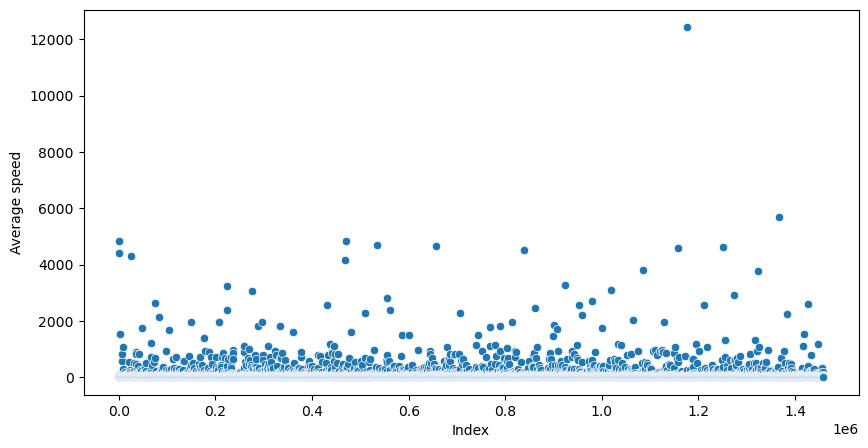

In [187]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [188]:
# Находим выбросы по длительности поездки:
outliers_duration = taxi_data[taxi_data['trip_duration'] > 24 * 3600]
num_outliers_duration = len(outliers_duration)
print(f"Количество поездок, длительность которых превышает 24 часа, равно {num_outliers_duration}")

# Удаляем выбросы:
taxi_data = taxi_data[taxi_data['trip_duration'] <= 24 * 3600]

# Вычисляем среднюю скорость на кратчайшем пути:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

# Находим выбросы по скорости:
outliers_speed = taxi_data[avg_speed > 300]
num_outliers_speed = len(outliers_speed)
print(f"Количество найденых выбросов по признаку скорости равно {num_outliers_speed}")

# Удаляем выбросы:
taxi_data = taxi_data[avg_speed <= 300]


Количество поездок, длительность которых превышает 24 часа, равно 4
Количество найденых выбросов по признаку скорости равно 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [189]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

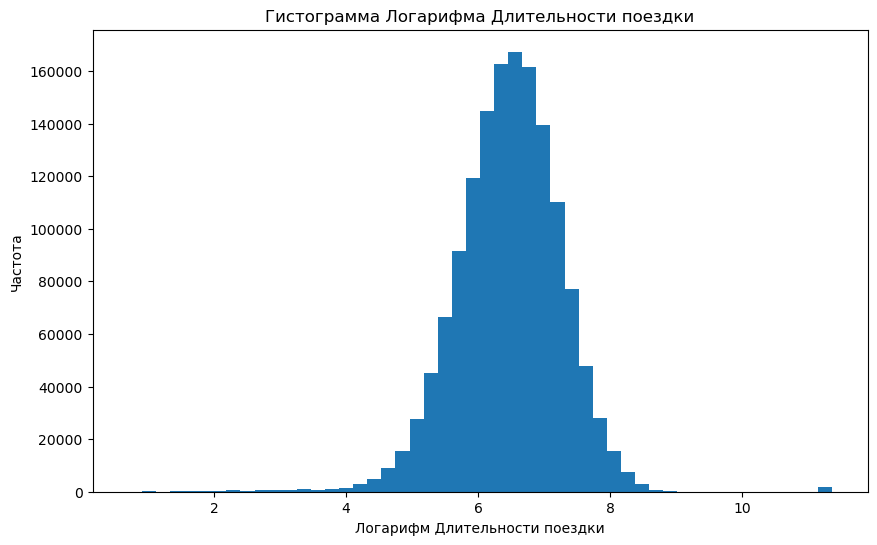

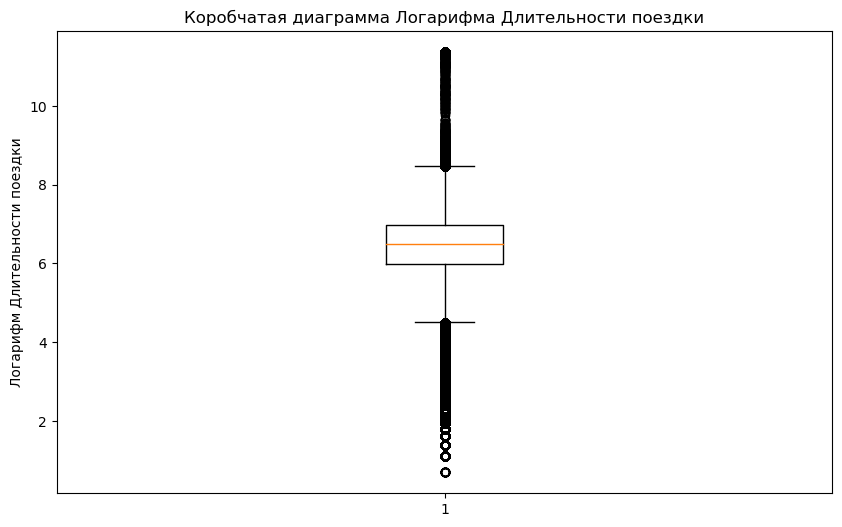

3.1.1) Значение p-value: 0.00
3.1.2) Распределение не является нормальным


In [190]:
# Преобразуем признак длительности поездки в логарифмический масштаб:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'] + 1)

# Строим гистограмму:
plt.figure(figsize=(10, 6))
plt.hist(taxi_data['trip_duration_log'], bins=50)
plt.xlabel('Логарифм Длительности поездки')
plt.ylabel('Частота')
plt.title('Гистограмма Логарифма Длительности поездки')
plt.show()

# Строим коробчатую диаграмму:
plt.figure(figsize=(10, 6))
plt.boxplot(taxi_data['trip_duration_log'])
plt.ylabel('Логарифм Длительности поездки')
plt.title('Коробчатая диаграмма Логарифма Длительности поездки')
plt.show()

# Проверяем гипотезу о нормальности распределения:
p_value = stats.normaltest(taxi_data['trip_duration_log']).pvalue

print(f"3.1.1) Значение p-value: {p_value:.2f}")

if p_value < 0.05:
    print("3.1.2) Распределение не является нормальным")
else:
    print("3.1.2) Распределение является нормальным")


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

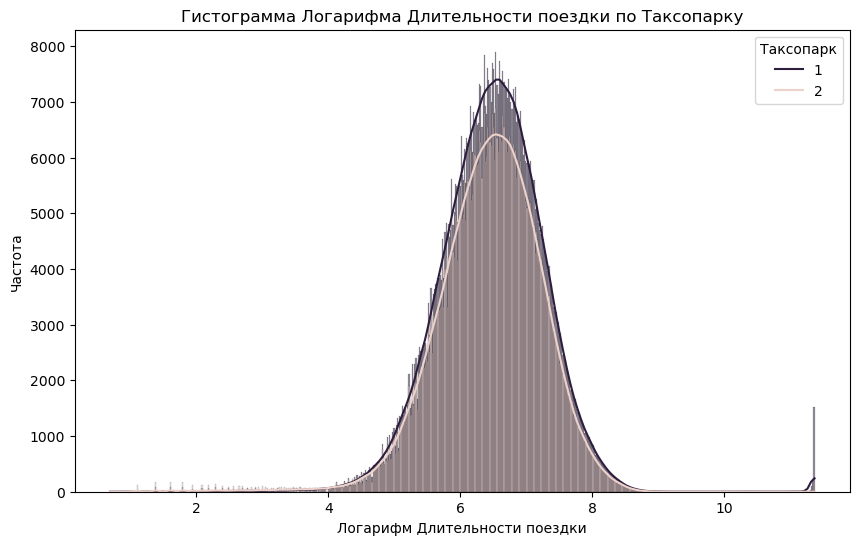

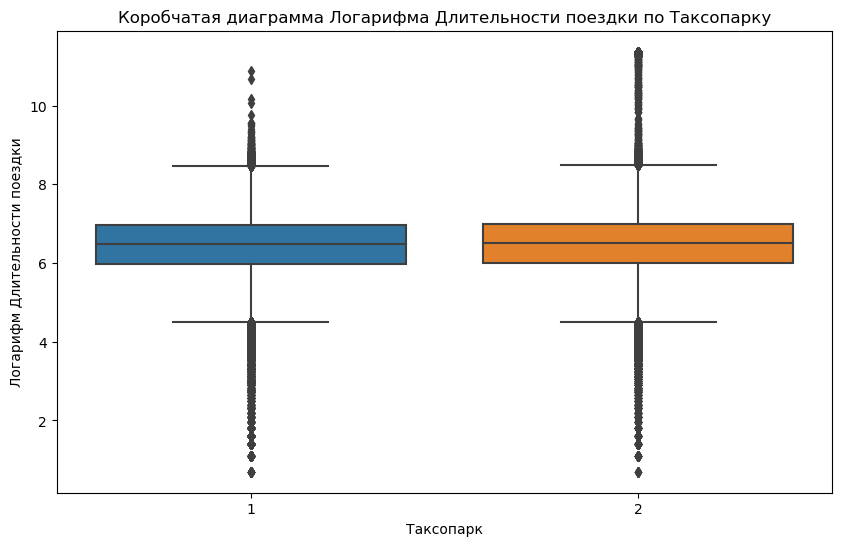

Распределения в группах практически не отличаются, признак 'vendor_id' не имеет значения при определении длительности поездки.


In [191]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=taxi_data, x='trip_duration_log', hue='vendor_id', kde=True)
plt.xlabel('Логарифм Длительности поездки')
plt.ylabel('Частота')
plt.title('Гистограмма Логарифма Длительности поездки по Таксопарку')
plt.legend(title='Таксопарк', labels=['1', '2'])
plt.show()

# Построение коробчатой диаграммы
plt.figure(figsize=(10, 6))
sns.boxplot(data=taxi_data, x='vendor_id', y='trip_duration_log')
plt.xlabel('Таксопарк')
plt.ylabel('Логарифм Длительности поездки')
plt.title('Коробчатая диаграмма Логарифма Длительности поездки по Таксопарку')
plt.show()

print("Распределения в группах практически не отличаются, признак 'vendor_id' не имеет значения при определении длительности поездки.")

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

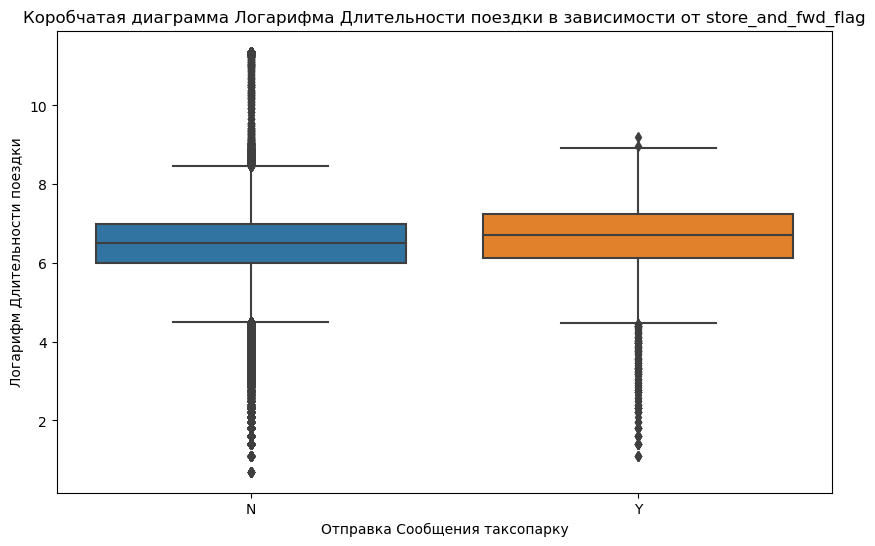

Распределения в группах значительно отличаются, признак 'store_and_fwd_flag' имеет значение при определении длительности поездки.


In [192]:
# Построение коробчатой диаграммы
plt.figure(figsize=(10, 6))
sns.boxplot(data=taxi_data, x='store_and_fwd_flag', y='trip_duration_log')
plt.xlabel('Отправка Сообщения таксопарку')
plt.ylabel('Логарифм Длительности поездки')
plt.title('Коробчатая диаграмма Логарифма Длительности поездки в зависимости от store_and_fwd_flag')
plt.show()

print("Распределения в группах значительно отличаются, признак 'store_and_fwd_flag' имеет значение при определении длительности поездки.")

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

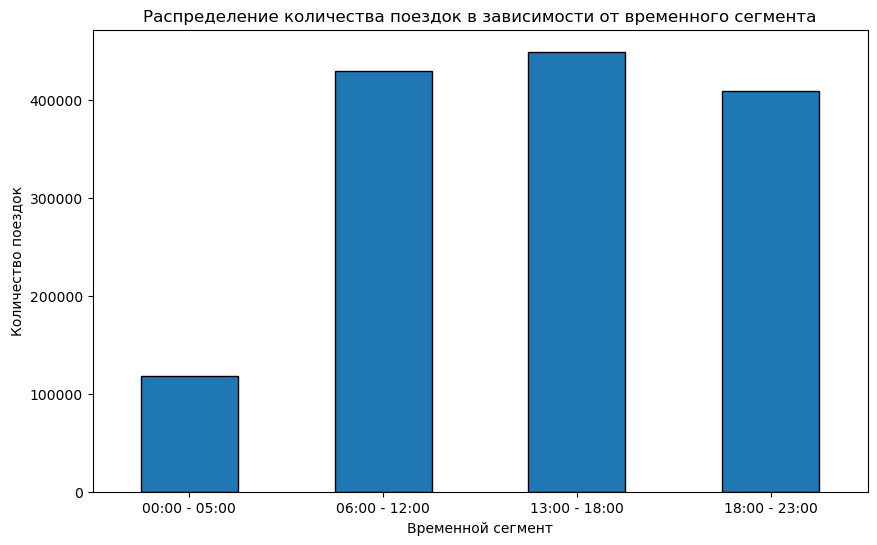

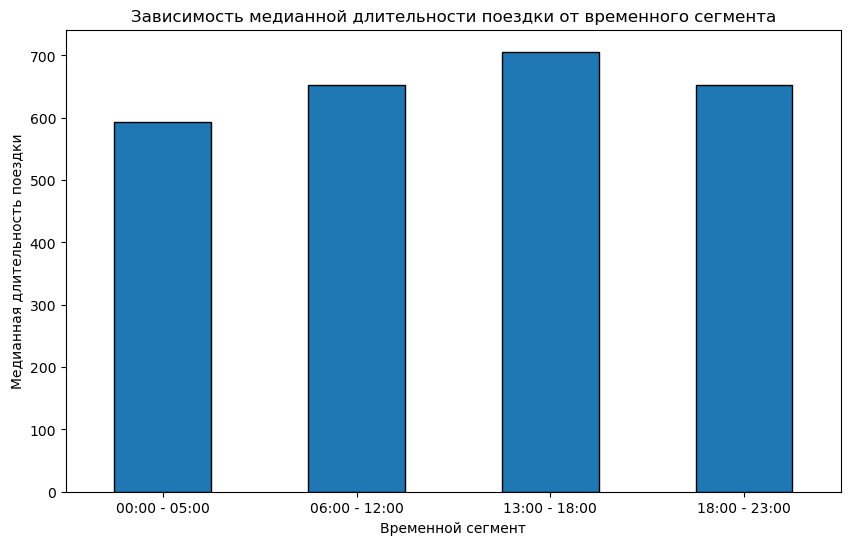

3.4.1) Такси заказывают реже всего с 00:00 по 5:00
3.4.2) Пик медианной длительности поездок наблюдается с 13:00 по 18:00


In [193]:
# Разделение на временные сегменты
time_segments = {
    '00:00 - 05:00': range(0, 6),
    '06:00 - 12:00': range(6, 13),
    '13:00 - 18:00': range(13, 19),
    '18:00 - 23:00': range(19, 24)
}

# Визуализация количества поездок
plt.figure(figsize=(10, 6))
taxi_data['pickup_hour_segment'] = pd.cut(taxi_data['pickup_hour'], bins=[0, 5, 12, 18, 23], labels=['00:00 - 05:00', '06:00 - 12:00', '13:00 - 18:00', '18:00 - 23:00'])
count_per_segment = taxi_data['pickup_hour_segment'].value_counts().sort_index()
count_per_segment.plot(kind='bar', edgecolor='k')
plt.xlabel('Временной сегмент')
plt.ylabel('Количество поездок')
plt.title('Распределение количества поездок в зависимости от временного сегмента')
plt.xticks(rotation=0)  # Горизонтальное размещение обозначений
plt.show()

from colorama import Fore

print()


# Визуализация медианной длительности поездки
plt.figure(figsize=(10, 6))
median_duration_segment = taxi_data.groupby('pickup_hour_segment')['trip_duration'].median()
median_duration_segment.plot(kind='bar', edgecolor='k')
plt.xlabel('Временной сегмент')
plt.ylabel('Медианная длительность поездки')
plt.title('Зависимость медианной длительности поездки от временного сегмента')
plt.xticks(rotation=0)  # Горизонтальное размещение обозначений
plt.show()

# Удаление столбца "pickup_hour_segment"
taxi_data.drop(['pickup_hour_segment'], axis=1, inplace=True)

print('3.4.1) Такси заказывают реже всего с 00:00 по 5:00')
print('3.4.2) Пик медианной длительности поездок наблюдается с 13:00 по 18:00')

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


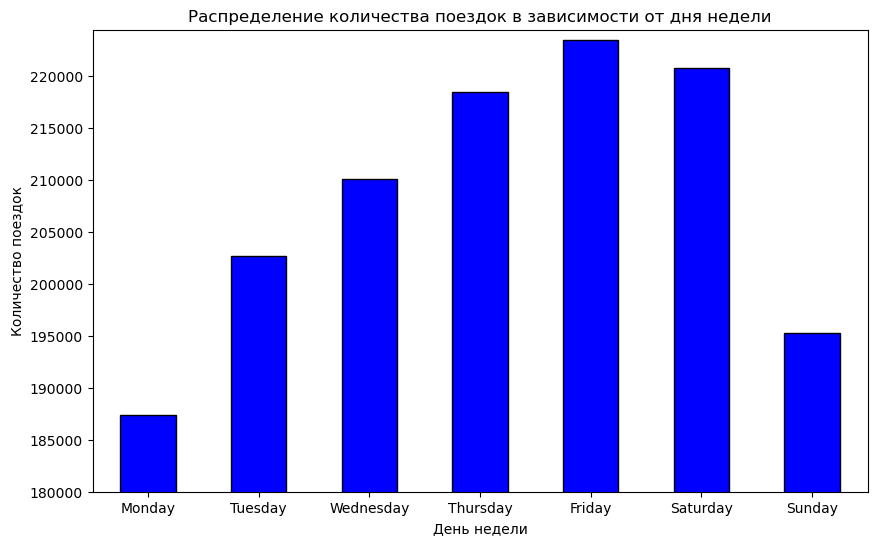

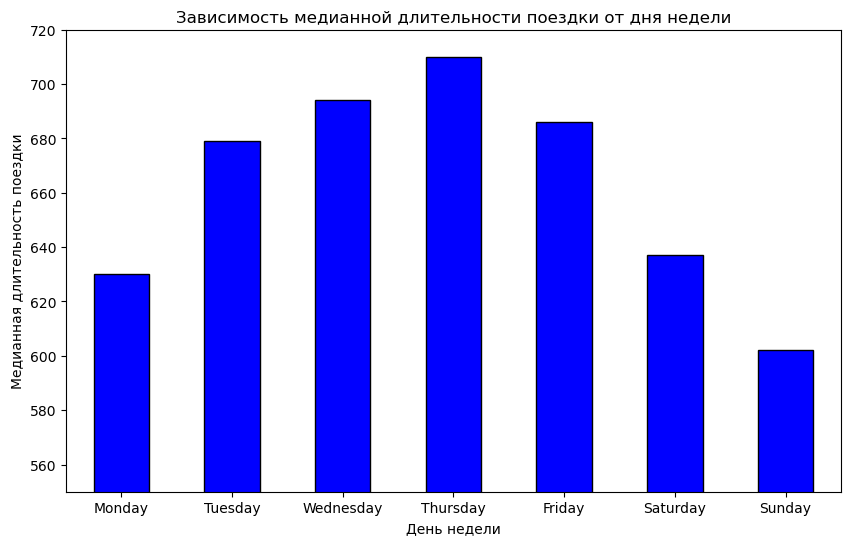

3.5.1) Больше всего поездок совершается по пятницам (Friday)
3.5.2) Наименьшая медианная длительность поездок в воскресенье (Sunday)


In [194]:
import calendar

# Распределение количества поездок в зависимости от дня недели
plt.figure(figsize=(10, 6))
count_per_weekday = taxi_data['pickup_day_of_week'].value_counts().sort_index()

# Упорядочивание дней недели
count_per_weekday = count_per_weekday.reindex(list(calendar.day_name))

ax = count_per_weekday.plot(kind='bar', edgecolor='k', color='blue')
ax.set_xlabel('День недели')
ax.set_ylabel('Количество поездок')
ax.set_title('Распределение количества поездок в зависимости от дня недели')
ax.set_xticklabels(count_per_weekday.index, rotation=0)
ax.set_ylim(180000, count_per_weekday.max() + 1000)
plt.show()


# Зависимость медианной длительности поездки от дня недели
plt.figure(figsize=(10, 6))
median_duration_weekday = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()

# Упорядочивание дней недели
median_duration_weekday = median_duration_weekday.reindex(list(calendar.day_name))

ax = median_duration_weekday.plot(kind='bar', edgecolor='k', color='blue')
ax.set_xlabel('День недели')
ax.set_ylabel('Медианная длительность поездки')
ax.set_title('Зависимость медианной длительности поездки от дня недели')
ax.set_xticklabels(median_duration_weekday.index, rotation=0)
ax.set_ylim(550, median_duration_weekday.max() + 10)
plt.show()

print('3.5.1) Больше всего поездок совершается по пятницам (Friday)')
print('3.5.2) Наименьшая медианная длительность поездок в воскресенье (Sunday)')

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

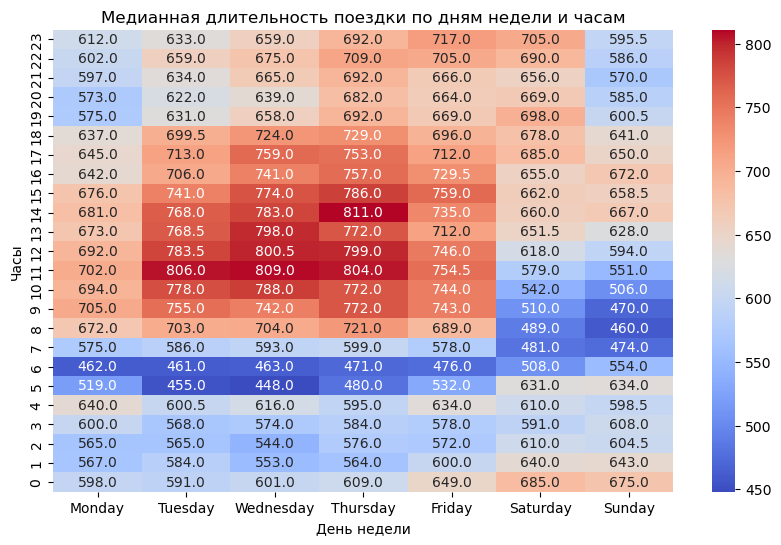

Верные варианты ответа:
A) Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.
B) Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.


In [195]:
import calendar

# Создание сводной таблицы с правильной сортировкой дней недели
pivot_table = taxi_data.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='trip_duration', aggfunc='median')
# Упорядочивание дней недели
pivot_table.columns = pd.CategoricalIndex(pivot_table.columns, categories=list(calendar.day_name), ordered=True)
pivot_table = pivot_table.sort_index(axis=1)

# Визуализация тепловой карты с правильной ориентацией
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table[::-1], cmap='coolwarm', annot=True, fmt=".1f", cbar=True)
plt.xlabel('День недели')
plt.ylabel('Часы')
plt.title('Медианная длительность поездки по дням недели и часам')
plt.show()

print('Верные варианты ответа:')
print('A) Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.')
print('B) Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.')

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


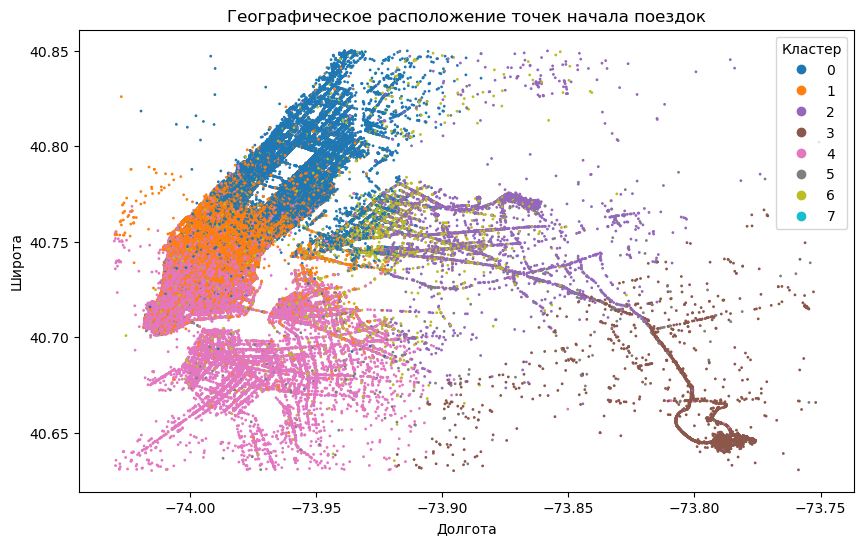

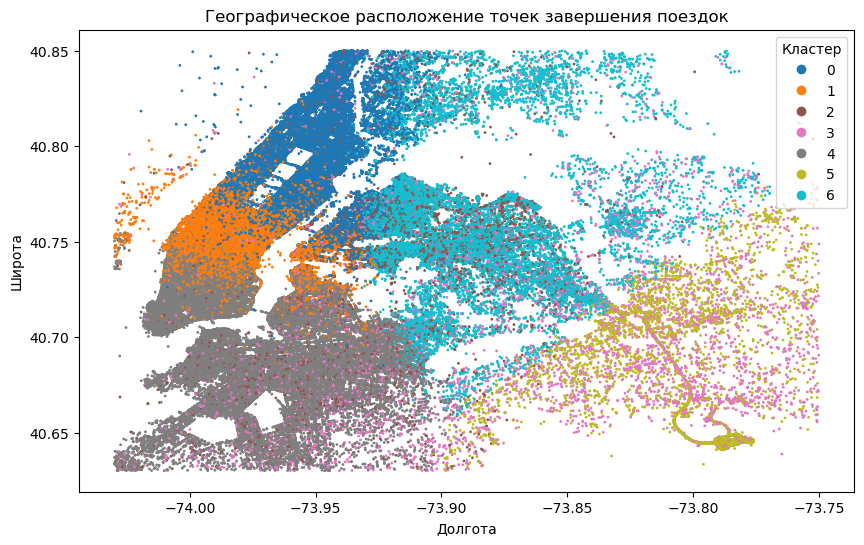

На обе диаграммы из 10 кластеров не попало 2.
________________________________________________________


In [196]:
# Границы Нью-Йорка
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Диаграмма рассеяния для точек начала поездок
plt.figure(figsize=(10, 6))
pickup_mask = (taxi_data['pickup_longitude'] >= city_long_border[0]) & (taxi_data['pickup_longitude'] <= city_long_border[1]) & \
              (taxi_data['pickup_latitude'] >= city_lat_border[0]) & (taxi_data['pickup_latitude'] <= city_lat_border[1])
scatter_pickup = plt.scatter(taxi_data.loc[pickup_mask, 'pickup_longitude'], taxi_data.loc[pickup_mask, 'pickup_latitude'], c=taxi_data.loc[pickup_mask, 'geo_cluster'], cmap='tab10', s=1)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Географическое расположение точек начала поездок')
plt.legend(handles=scatter_pickup.legend_elements()[0], labels=range(10), title='Кластер', loc='upper right')
plt.show()

# Диаграмма рассеяния для точек завершения поездок
plt.figure(figsize=(10, 6))
dropoff_mask = (taxi_data['dropoff_longitude'] >= city_long_border[0]) & (taxi_data['dropoff_longitude'] <= city_long_border[1]) & \
               (taxi_data['dropoff_latitude'] >= city_lat_border[0]) & (taxi_data['dropoff_latitude'] <= city_lat_border[1])
scatter_dropoff = plt.scatter(taxi_data.loc[dropoff_mask, 'dropoff_longitude'], taxi_data.loc[dropoff_mask, 'dropoff_latitude'], c=taxi_data.loc[dropoff_mask, 'geo_cluster'], cmap='tab10', s=1)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Географическое расположение точек завершения поездок')
plt.legend(handles=scatter_dropoff.legend_elements()[0], labels=range(10), title='Кластер', loc='upper right')
plt.show()

print('На обе диаграммы из 10 кластеров не попало 2.')
print('________________________________________________________')

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [197]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [198]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,0,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,6,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,6,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,6,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,0,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [199]:
print("а) Таковым является признак 'id' \n")

print("""б) Утечка данных (data leak) - это ситуация, в которой данные используемые для обучения модели, 
содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях. \n""")

print("в) Утечку данных создаёт наличие признака 'dropoff_datetime' \n")

# г) Исключаем признаки, выбранные в пунктах а и в, из исходной таблицы с данными:
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)

print('г) Shape of data:  {}'.format(train_data.shape))
print('В таблице осталось 25 столбцов')
print('____________________________________________________________')

а) Таковым является признак 'id' 

б) Утечка данных (data leak) - это ситуация, в которой данные используемые для обучения модели, 
содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях. 

в) Утечку данных создаёт наличие признака 'dropoff_datetime' 

г) Shape of data:  (1458233, 25)
В таблице осталось 25 столбцов
____________________________________________________________


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [200]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [201]:
# Кодируем признак vendor_id:
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

# Кодируем признак store_and_fwd_flag:
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# Рассчитываем среднее по закодированному столбцу vendor_id:
mean_vendor_id = train_data['vendor_id'].mean()
rounded_mean_vendor_id = round(mean_vendor_id, 2)
print(f"4.2.1) Cреднее по закодированному столбцу 'vendor_id' составляет: {rounded_mean_vendor_id} \n")

# Рассчитываем среднее по закодированному столбцу store_and_fwd_flag:
mean_store_and_fwd_flag = train_data['store_and_fwd_flag'].mean()
rounded_mean_store_and_fwd_flag = round(mean_store_and_fwd_flag, 3)
print(f"4.2.2) Cреднее по закодированному столбцу 'store_and_fwd_flag' составляет: {rounded_mean_store_and_fwd_flag}")

4.2.1) Cреднее по закодированному столбцу 'vendor_id' составляет: 0.53 

4.2.2) Cреднее по закодированному столбцу 'store_and_fwd_flag' составляет: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [202]:
from sklearn.preprocessing import OneHotEncoder

# Выбираем признаки для кодирования:
features_to_encode = ['pickup_day_of_week', 'geo_cluster', 'events']

# Создаем объект OneHotEncoder:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Производим однократное кодирование признаков:
data_onehot = one_hot_encoder.fit_transform(train_data[features_to_encode])

# Получаем закодированные имена столбцов:
column_names = one_hot_encoder.get_feature_names_out()

# Составляем DataFrame из закодированных признаков:
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

# Количество сгенерированных бинарных столбцов:
num_binary_columns = len(column_names)

# Выводим результат:
print("Количество сгенерированных бинарных столбцов:", num_binary_columns)
data_onehot.head()

Количество сгенерированных бинарных столбцов: 18


,pickup_day_of_week_Monday,pickup_day_of_week_Saturday,pickup_day_of_week_Sunday,pickup_day_of_week_Thursday,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Добавим полученную таблицу с закодированными признаками:

In [203]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [204]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [205]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [206]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Создаем объект SelectKBest:
selector = SelectKBest(score_func=lambda X, y: np.abs(f_regression(X, y)[0]), k=25)

# Применяем отбор признаков на обучающей выборке:
X_train_selected = selector.fit_transform(X_train, y_train_log)

# Оставляем только отобранные признаки в обучающей выборке:
X_train_selected = pd.DataFrame(X_train_selected, columns=X_train.columns[selector.get_support()])

# Оставляем только отобранные признаки в валидационной выборке:
X_valid_selected = X_valid[X_train_selected.columns]

# Выводим форму выборок после отбора признаков:
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_valid_selected:", X_valid_selected.shape)
print()

display(X_train_selected.info())
print()
print("""В список отобранных вошли следующие признаки:
A) vendor_id
B) passenger_count
C) number_of_steps
D) temperature""")

Shape of X_train_selected: (977016, 25)
Shape of X_valid_selected: (481217, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  float64
 1   passenger_count               977016 non-null  float64
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  float64
 7   pickup_hour                   977016 non-null  float64
 8   pickup_holiday                977016 non-null  float64
 9   total_distance                977016 non-null  float64
 10  total_travel_time             977016 non-null  float64
 11  number_of_steps        

None


В список отобранных вошли следующие признаки:
A) vendor_id
B) passenger_count
C) number_of_steps
D) temperature


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [207]:
from sklearn.preprocessing import MinMaxScaler

# Создаем объект MinMaxScaler:
scaler = MinMaxScaler()

# Нормализуем предикторы в обучающей и валидационной выборках:
X_train_scaled = scaler.fit_transform(X_train_selected)
X_valid_scaled = scaler.transform(X_valid_selected)

# Рассчитываем среднее арифметическое для первого предиктора в валидационной выборке:
mean_first_predictor = np.mean(X_valid_scaled[:, 0])

# Выводим среднее арифметическое первого предиктора:
print("Среднее арифметическое для первого предиктора из валидационной выборки составляет: {:.2f}".format(mean_first_predictor))


Среднее арифметическое для первого предиктора из валидационной выборки составляет: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем объект линейной регрессии:
regression_model = LinearRegression()

# Обучаем модель на тренировочной выборке:
regression_model.fit(X_train_scaled, y_train_log)

# Делаем предсказания на тренировочной и валидационной выборках:
y_train_pred = regression_model.predict(X_train_scaled)
y_valid_pred = regression_model.predict(X_valid_scaled)

# Рассчитываем метрику RMSLE на тренировочной выборке:
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

# Рассчитываем метрику RMSLE на валидационной выборке:
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

# Выводим метрику RMSLE на тренировочной и валидационной выборках:
print("RMSLE на тренировочной выборке: {:.2f}".format(rmsle_train))
print("RMSLE на валидационной выборке: {:.2f}".format(rmsle_valid))


RMSLE на тренировочной выборке: 0.53
RMSLE на валидационной выборке: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [209]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем объект PolynomialFeatures для генерации полиномиальных признаков:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Генерируем полиномиальные признаки на обучающей и валидационной выборках:
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_valid_poly = poly_features.transform(X_valid_scaled)

# Создаем объект линейной регрессии для модели полиномиальной регрессии:
poly_regression_model = LinearRegression()

# Обучаем модель полиномиальной регрессии на тренировочной выборке:
poly_regression_model.fit(X_train_poly, y_train_log)

# Делаем предсказания на тренировочной и валидационной выборках:
y_train_pred_poly = poly_regression_model.predict(X_train_poly)
y_valid_pred_poly = poly_regression_model.predict(X_valid_poly)

# Рассчитываем метрику RMSLE на тренировочной выборке:
rmsle_train_poly = np.sqrt(mean_squared_error(y_train_log, y_train_pred_poly))

# Рассчитываем метрику RMSLE на валидационной выборке:
rmsle_valid_poly = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_poly))

# Выводим метрику RMSLE на тренировочной и валидационной выборках:
print("Задание 5.2.1")
print("RMSLE на тренировочной выборке (полиномиальная регрессия): {:.2f}".format(rmsle_train_poly))
print("RMSLE на валидационной выборке (полиномиальная регрессия): {:.2f}".format(rmsle_valid_poly))
print()
print("Задание 5.2.2")
print("""Да, у данной модели наблюдаются признаки переобучения.
Об этом свидетельствует увеличение значения RMSLE 
на валидационной выборке по сравнению с тренировочной выборкой.""")


Задание 5.2.1
RMSLE на тренировочной выборке (полиномиальная регрессия): 0.47
RMSLE на валидационной выборке (полиномиальная регрессия): 0.61

Задание 5.2.2
Да, у данной модели наблюдаются признаки переобучения.
Об этом свидетельствует увеличение значения RMSLE 
на валидационной выборке по сравнению с тренировочной выборкой.


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [210]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error

# Создаем модель Ridge с L2-регуляризацией и коэффициентом регуляризации alpha=1:
ridge_model = Ridge(alpha=1)

# Обучаем модель на тренировочной выборке:
ridge_model.fit(X_train_poly, y_train_log)

# Делаем предсказания на тренировочной и валидационной выборках:
y_train_pred = ridge_model.predict(X_train_poly)
y_valid_pred = ridge_model.predict(X_valid_poly)

# Рассчитываем метрику RMSLE:
rmsle_train = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_pred)))
rmsle_valid = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_pred)))

# Выводим результаты:
print("RMSLE на тренировочной выборке (полиномиальная регрессия с L2-регуляризацией): {:.2f}".format(rmsle_train))
print("RMSLE на валидационной выборке (полиномиальная регрессия с L2-регуляризацией): {:.2f}".format(rmsle_valid))


RMSLE на тренировочной выборке (полиномиальная регрессия с L2-регуляризацией): 0.47
RMSLE на валидационной выборке (полиномиальная регрессия с L2-регуляризацией): 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [211]:
from sklearn.tree import DecisionTreeRegressor

# Создаем модель дерева решений:
tree_model = DecisionTreeRegressor(random_state=42)

# Обучаем модель на тренировочной выборке:
tree_model.fit(X_train_scaled, y_train_log)

# Делаем предсказания на тренировочной и валидационной выборках:
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_valid_pred_tree = tree_model.predict(X_valid_scaled)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках:
rmsle_train_tree = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_pred_tree)))
rmsle_valid_tree = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_pred_tree)))

# Выводим результаты:
print("Задание 5.4.1")
print("RMSLE на тренировочной выборке (дерево решений): {:.2f}".format(rmsle_train_tree))
print("RMSLE на валидационной выборке (дерево решений): {:.2f}".format(rmsle_valid_tree))
print()
print("Задание 5.4.2")
print("""Да, у данной модели наблюдаются признаки переобучения.
Об этом свидетельствует увеличение значения RMSLE 
на валидационной выборке по сравнению с тренировочной выборкой.""")


Задание 5.4.1
RMSLE на тренировочной выборке (дерево решений): 0.00
RMSLE на валидационной выборке (дерево решений): 0.56

Задание 5.4.2
Да, у данной модели наблюдаются признаки переобучения.
Об этом свидетельствует увеличение значения RMSLE 
на валидационной выборке по сравнению с тренировочной выборкой.


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


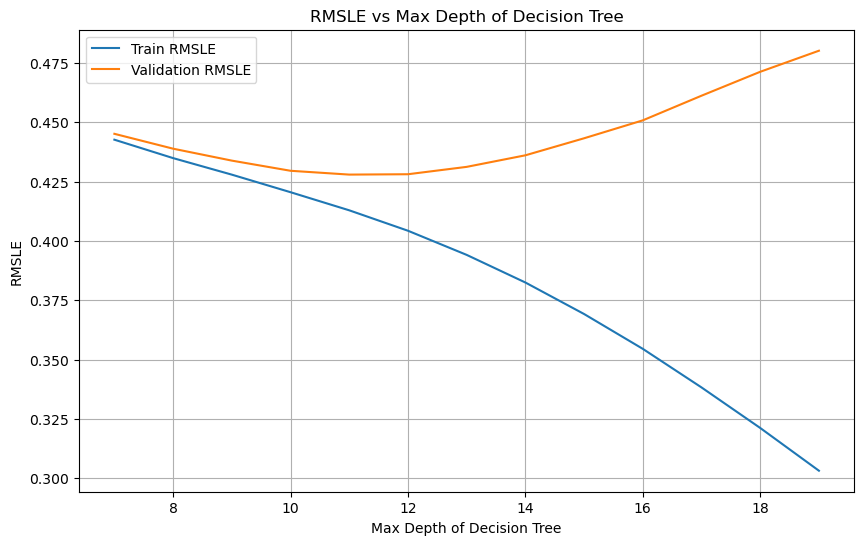

Оптимальное значение глубины дерева: 11
RMSLE на тренировочной выборке (дерево решений с оптимальной глубиной): 0.41
RMSLE на валидационной выборке (дерево решений с оптимальной глубиной): 0.43


In [212]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Создаем список для сохранения значений метрики RMSLE на тренировочной и валидационной выборках:
rmsle_train_list = []
rmsle_valid_list = []

# Задаем диапазон значений глубины дерева:
max_depths = range(7, 20)

# Перебираем различные значения глубины дерева:
for depth in max_depths:
    # Создаем модель дерева решений с указанной глубиной и random_state=42:
    tree_model_optimal = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    # Обучаем модель на тренировочной выборке:
    tree_model_optimal.fit(X_train_scaled, y_train_log)
    
    # Делаем предсказания на тренировочной и валидационной выборках:
    y_train_pred_tree = tree_model_optimal.predict(X_train_scaled)
    y_valid_pred_tree = tree_model_optimal.predict(X_valid_scaled)
    
    # Рассчитываем метрику RMSLE на тренировочной и валидационной выборках:
    rmsle_train = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_pred_tree)))
    rmsle_valid = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_pred_tree)))
    
    # Сохраняем значения метрики в списки:
    rmsle_train_list.append(rmsle_train)
    rmsle_valid_list.append(rmsle_valid)

# Строим графики изменения метрики RMSLE в зависимости от глубины дерева:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, rmsle_train_list, label='Train RMSLE')
plt.plot(max_depths, rmsle_valid_list, label='Validation RMSLE')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('RMSLE')
plt.legend()
plt.grid()
plt.title('RMSLE vs Max Depth of Decision Tree')
plt.show()

# Найдем оптимальное значение глубины дерева, при котором нет переобучения:
optimal_depth = max_depths[np.argmin(rmsle_valid_list)]
print("Оптимальное значение глубины дерева:", optimal_depth)

# Повторно обучим модель на оптимальной глубине и рассчитаем метрику RMSLE:
tree_model_optimal = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
tree_model_optimal.fit(X_train_scaled, y_train_log)
y_train_pred_optimal = tree_model_optimal.predict(X_train_scaled)
y_valid_pred_optimal = tree_model_optimal.predict(X_valid_scaled)
rmsle_train_optimal = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_pred_optimal)))
rmsle_valid_optimal = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_pred_optimal)))

# Выводим результаты:
print("RMSLE на тренировочной выборке (дерево решений с оптимальной глубиной): {:.2f}".format(rmsle_train_optimal))
print("RMSLE на валидационной выборке (дерево решений с оптимальной глубиной): {:.2f}".format(rmsle_valid_optimal))


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Создаем модель случайного леса с заданными гиперпараметрами:
model_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    n_jobs=-1
)

# Обучаем модель на тренировочной выборке:
model_rf.fit(X_train_scaled, y_train_log)

# Делаем предсказания на тренировочной и валидационной выборках:
y_train_rf_pred = model_rf.predict(X_train_scaled)
y_valid_rf_pred = model_rf.predict(X_valid_scaled)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках:
rmsle_train_rf = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_rf_pred)))
rmsle_valid_rf = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_rf_pred)))

# Вывод результатов:
print("RMSLE на тренировочной выборке (случайный лес): {:.2f}".format(rmsle_train_rf))
print("RMSLE на валидационной выборке (случайный лес): {:.2f}".format(rmsle_valid_rf))


RMSLE на тренировочной выборке (случайный лес): 0.40
RMSLE на валидационной выборке (случайный лес): 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [214]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Создаем модель градиентного бустинга с заданными гиперпараметрами:
model_gb = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)

# Обучаем модель на тренировочной выборке:
model_gb.fit(X_train_scaled, y_train_log)

# Делаем предсказания на тренировочной и валидационной выборках:
y_train_gb_pred = model_gb.predict(X_train_scaled)
y_valid_gb_pred = model_gb.predict(X_valid_scaled)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках:
rmsle_gb_train = np.sqrt(mean_squared_log_error(np.exp(y_train_log), np.exp(y_train_gb_pred)))
rmsle_gb_valid = np.sqrt(mean_squared_log_error(np.exp(y_valid_log), np.exp(y_valid_gb_pred)))

# Вывод результатов:
print("RMSLE на тренировочной выборке (градиентный бустинг): {:.2f}".format(rmsle_gb_train))
print("RMSLE на валидационной выборке (градиентный бустинг): {:.2f}".format(rmsle_gb_valid))


RMSLE на тренировочной выборке (градиентный бустинг): 0.37
RMSLE на валидационной выборке (градиентный бустинг): 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* X - Градиентный бустинг над деревьями решений (данная модель показала с 0.39 наименьшее значение RMSLE на валидационной выборке)


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


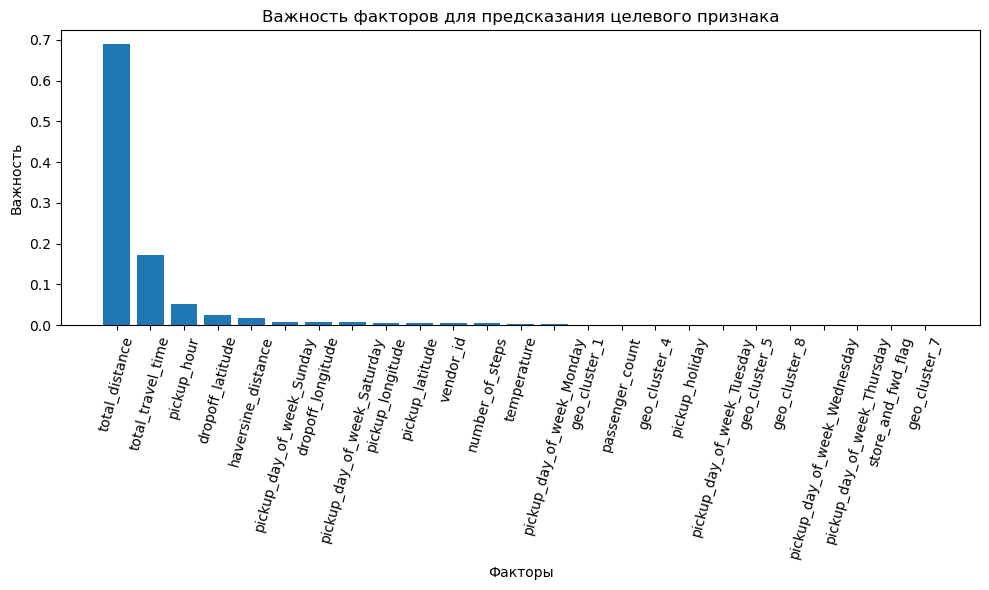

Топ-3 факторов, наиболее значимых для предсказания целевого признака:
Index(['total_distance', 'total_travel_time', 'pickup_hour'], dtype='object')


In [215]:
# Получаем значения важности факторов:
importances = model_rf.feature_importances_

# Получаем названия факторов (признаков):
feature_names = X_train_selected.columns

# Сортируем факторы по их важности в убывающем порядке:
indices = np.argsort(importances)[::-1]

# Определяем топ-3 факторов:
top_3_features = feature_names[indices[:3]]

# Построение столбчатой диаграммы:
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=75)
plt.xlabel('Факторы')
plt.ylabel('Важность')
plt.title('Важность факторов для предсказания целевого признака')
plt.tight_layout()
plt.show()

# Вывод топ-3 факторов:
print("Топ-3 факторов, наиболее значимых для предсказания целевого признака:")
print(top_3_features)


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [216]:
from sklearn.metrics import median_absolute_error

# Обратно преобразуем предсказанные значения из логарифмического масштаба в исходный масштаб:
y_valid_gb_pred_orig = np.exp(y_valid_gb_pred) - 1

# Обратно преобразуем исходные значения из логарифмического масштаба в исходный масштаб:
y_valid_gb_orig = np.exp(y_valid_log) - 1

# Рассчитываем медианную абсолютную ошибку:
median_absolute_error_minutes = median_absolute_error(y_valid_gb_pred_orig, y_valid_gb_orig)

# Вывод результатов:
print("Медианная абсолютная ошибка на валидационной выборке: {:.1f} минут".format(median_absolute_error_minutes))
print('____________________________________________________________________________________________')


Медианная абсолютная ошибка на валидационной выборке: 109.7 минут
____________________________________________________________________________________________


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [217]:
test_data = pd.read_csv("data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.csv")
# Cтолбец с идентификаторами поездок из тестового набора данных выделим после создания тестовой матрицы наблюдений

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [218]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change])
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)

best_features = X_train_selected.columns
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)

test_id = test_data['id'] # выделение столбца с идентификаторами поездок из тестового набора данных

print('Shape of data: {}'.format(X_test.shape))

Shape of data: (1458233, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [219]:
# Делаем предсказания на тестовой выборке:
y_test_pred_log = model_gb.predict(X_test_scaled)

# Переводим предсказания из логарифмического масштаба в истинный масштаб:
y_test_pred = np.exp(y_test_pred_log) - 1

# Создаём DataFrame с предсказаниями и идентификаторами поездок:
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_pred})

# Сохраняем DataFrame в csv-файл:
submission.to_csv('data/submission_gb.csv', index=False)


In [220]:
display(submission)
display(test_data[['id', 'trip_duration']])

,id,trip_duration
0,id2875421,597.612493
1,id2377394,613.718343
2,id3858529,1673.970616
3,id3504673,495.124140
4,id2181028,332.017329
...,...,...
1458228,id2376096,510.363476
1458229,id1049543,739.659174
1458230,id2304944,735.431033
1458231,id2714485,551.038567


,id,trip_duration
0,id2875421,455
1,id2377394,663
2,id3858529,2124
3,id3504673,429
4,id2181028,435
...,...,...
1458228,id2376096,778
1458229,id1049543,655
1458230,id2304944,764
1458231,id2714485,373


### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [221]:
!pip install xgboost

После чего модуль можно импортировать:

In [222]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [223]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [224]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #ранняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42218	valid-rmse:5.42189
[10]	train-rmse:1.93581	valid-rmse:1.93575
[20]	train-rmse:0.78514	valid-rmse:0.78601
[30]	train-rmse:0.47873	valid-rmse:0.48081
[40]	train-rmse:0.42070	valid-rmse:0.42344
[50]	train-rmse:0.40891	valid-rmse:0.41214
[60]	train-rmse:0.40378	valid-rmse:0.40737
[70]	train-rmse:0.40086	valid-rmse:0.40482
[80]	train-rmse:0.39864	valid-rmse:0.40286
[90]	train-rmse:0.39712	valid-rmse:0.40160
[100]	train-rmse:0.39578	valid-rmse:0.40051
[110]	train-rmse:0.39465	valid-rmse:0.39967
[120]	train-rmse:0.39360	valid-rmse:0.39897
[130]	train-rmse:0.39229	valid-rmse:0.39791
[140]	train-rmse:0.39106	valid-rmse:0.39707
[150]	train-rmse:0.38986	valid-rmse:0.39626
[160]	train-rmse:0.38893	valid-rmse:0.39563
[170]	train-rmse:0.38812	valid-rmse:0.39512
[180]	train-rmse:0.38739	valid-rmse:0.39466
[190]	train-rmse:0.38649	valid-rmse:0.39408
[200]	train-rmse:0.38573	valid-rmse:0.39370
[210]	train-rmse:0.38505	valid-rmse:0.39335
[220]	train-rmse:0.38464	valid-rmse:0.39322

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [225]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39174


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

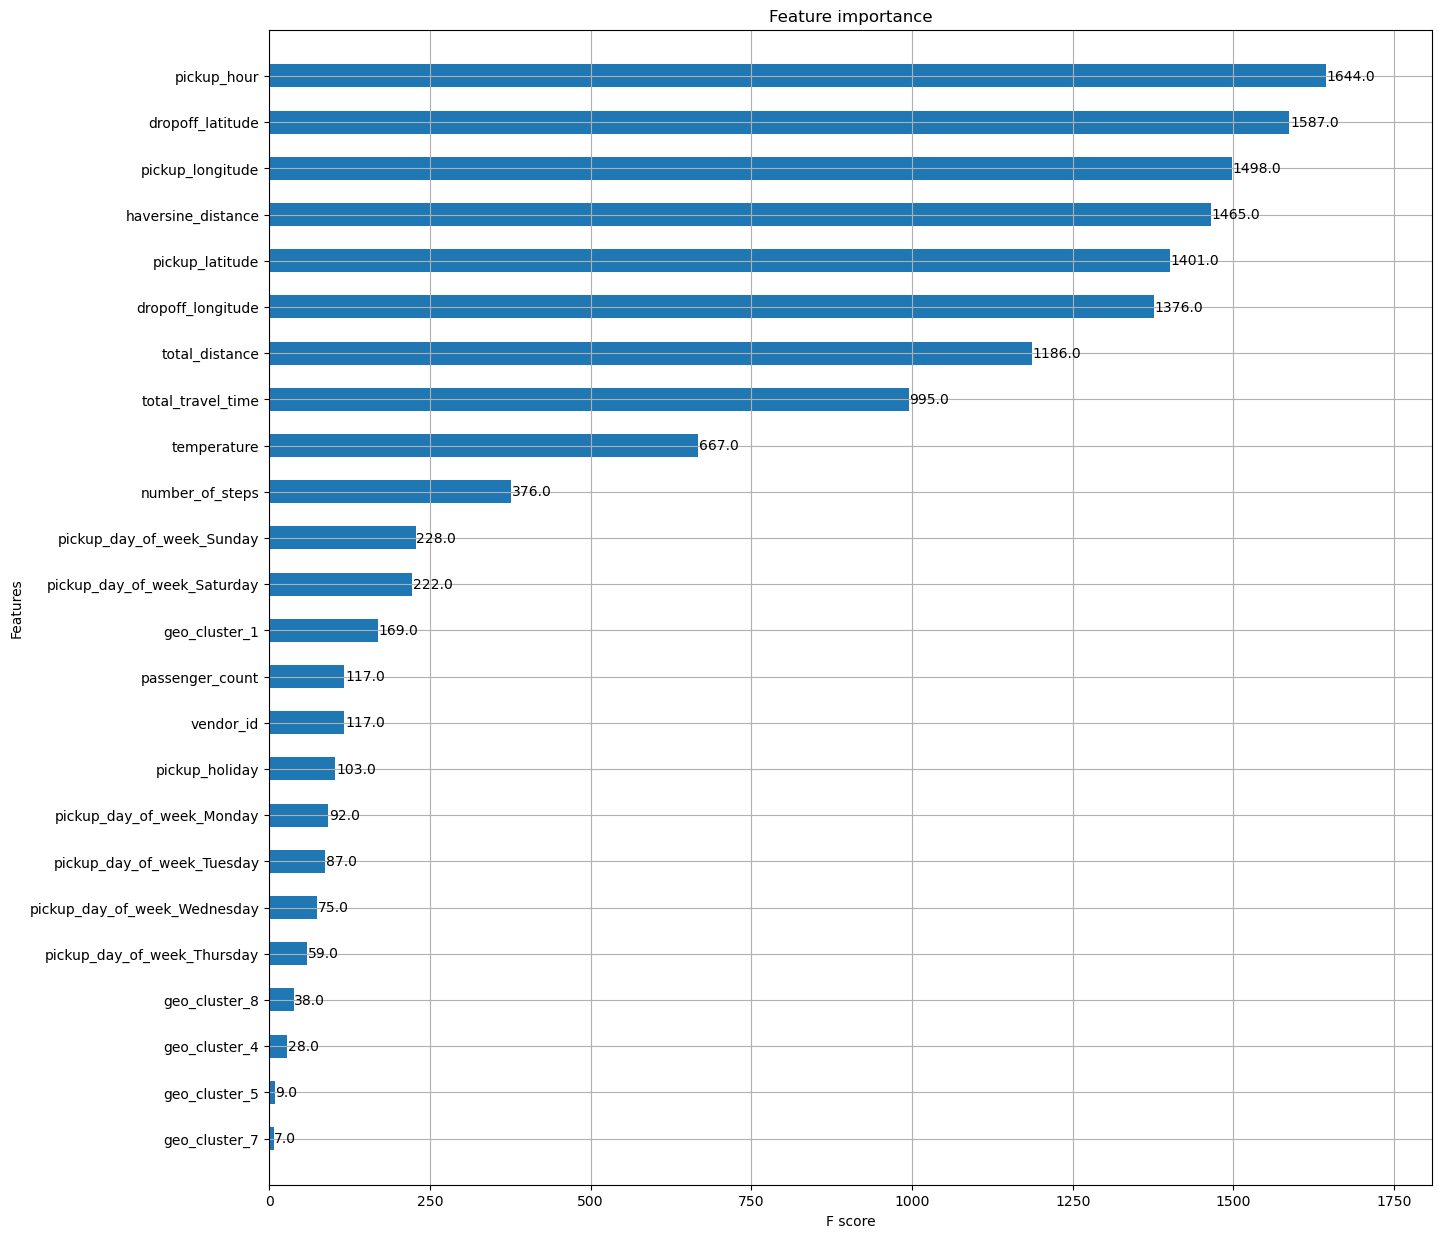

In [226]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)